In [13]:
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('data/train.csv')
print(data.shape)
data = data.join(pd.read_csv('data/y_train.csv'), how='left')
print(data.shape)
data.head(2)

(720000, 58)
(720000, 59)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,y_train
0,"-131,97405146667",12.0,"13,0",11.747860,1.0,2.0,"22,0","-27,750277493704",9.0,NaN,...,3.0,"11,0",40.588345,16.957673,14.360604,"-53,415701398274706",NaN,NaN,-40.849368,1
1,"-48,3041715861774",9.0,"10,0",10.436009,1.0,NaN,"24,0","-25,703719919085497",8.0,0.0,...,2.0,NaN,27.113802,-61.457339,2.627029,"-39,6179932194784",24.686063,NaN,-45.108764,1


In [3]:
for c in data.columns:
    if data[c].dtype == 'O':
        data[c] = data[c].str.replace(',', '.').astype(float)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720000 entries, 0 to 719999
Data columns (total 59 columns):
feature_1     656351 non-null float64
feature_2     647084 non-null float64
feature_3     665252 non-null float64
feature_4     662312 non-null float64
feature_5     655438 non-null float64
feature_6     637388 non-null float64
feature_7     633071 non-null float64
feature_8     637224 non-null float64
feature_9     672108 non-null float64
feature_10    635192 non-null float64
feature_11    633531 non-null float64
feature_12    657614 non-null float64
feature_13    641144 non-null float64
feature_14    658199 non-null float64
feature_15    628189 non-null float64
feature_16    657553 non-null float64
feature_17    643402 non-null float64
feature_18    646214 non-null float64
feature_19    685924 non-null float64
feature_20    663822 non-null float64
feature_21    643262 non-null float64
feature_22    651121 non-null float64
feature_23    614819 non-null float64
feature_24    6

In [6]:
data_stats = data.describe().T
data_stats

,count,mean,std,min,25%,50%,75%,max
feature_1,656351.0,11.076267,100.034568,-480.088690,-56.323033,11.137026,78.460599,483.022802
feature_2,647084.0,12.329582,0.796751,7.000000,12.000000,13.000000,13.000000,13.000000
feature_3,665252.0,11.342324,1.662567,3.000000,10.000000,11.000000,13.000000,15.000000
feature_4,662312.0,25.416516,20.630278,-72.310070,11.521055,25.435029,39.343553,128.900592
feature_5,655438.0,0.313636,0.537229,0.000000,0.000000,0.000000,1.000000,4.000000
feature_6,637388.0,2.181676,0.770063,0.000000,2.000000,2.000000,3.000000,3.000000
feature_7,633071.0,23.222787,0.867250,17.000000,23.000000,23.000000,24.000000,24.000000
feature_8,637224.0,-46.308927,19.882869,-138.181159,-59.732242,-46.295015,-32.910225,55.334255
feature_9,672108.0,7.902202,1.285814,1.000000,7.000000,8.000000,9.000000,10.000000
feature_10,635192.0,0.269337,0.443616,0.000000,0.000000,0.000000,1.000000,1.000000


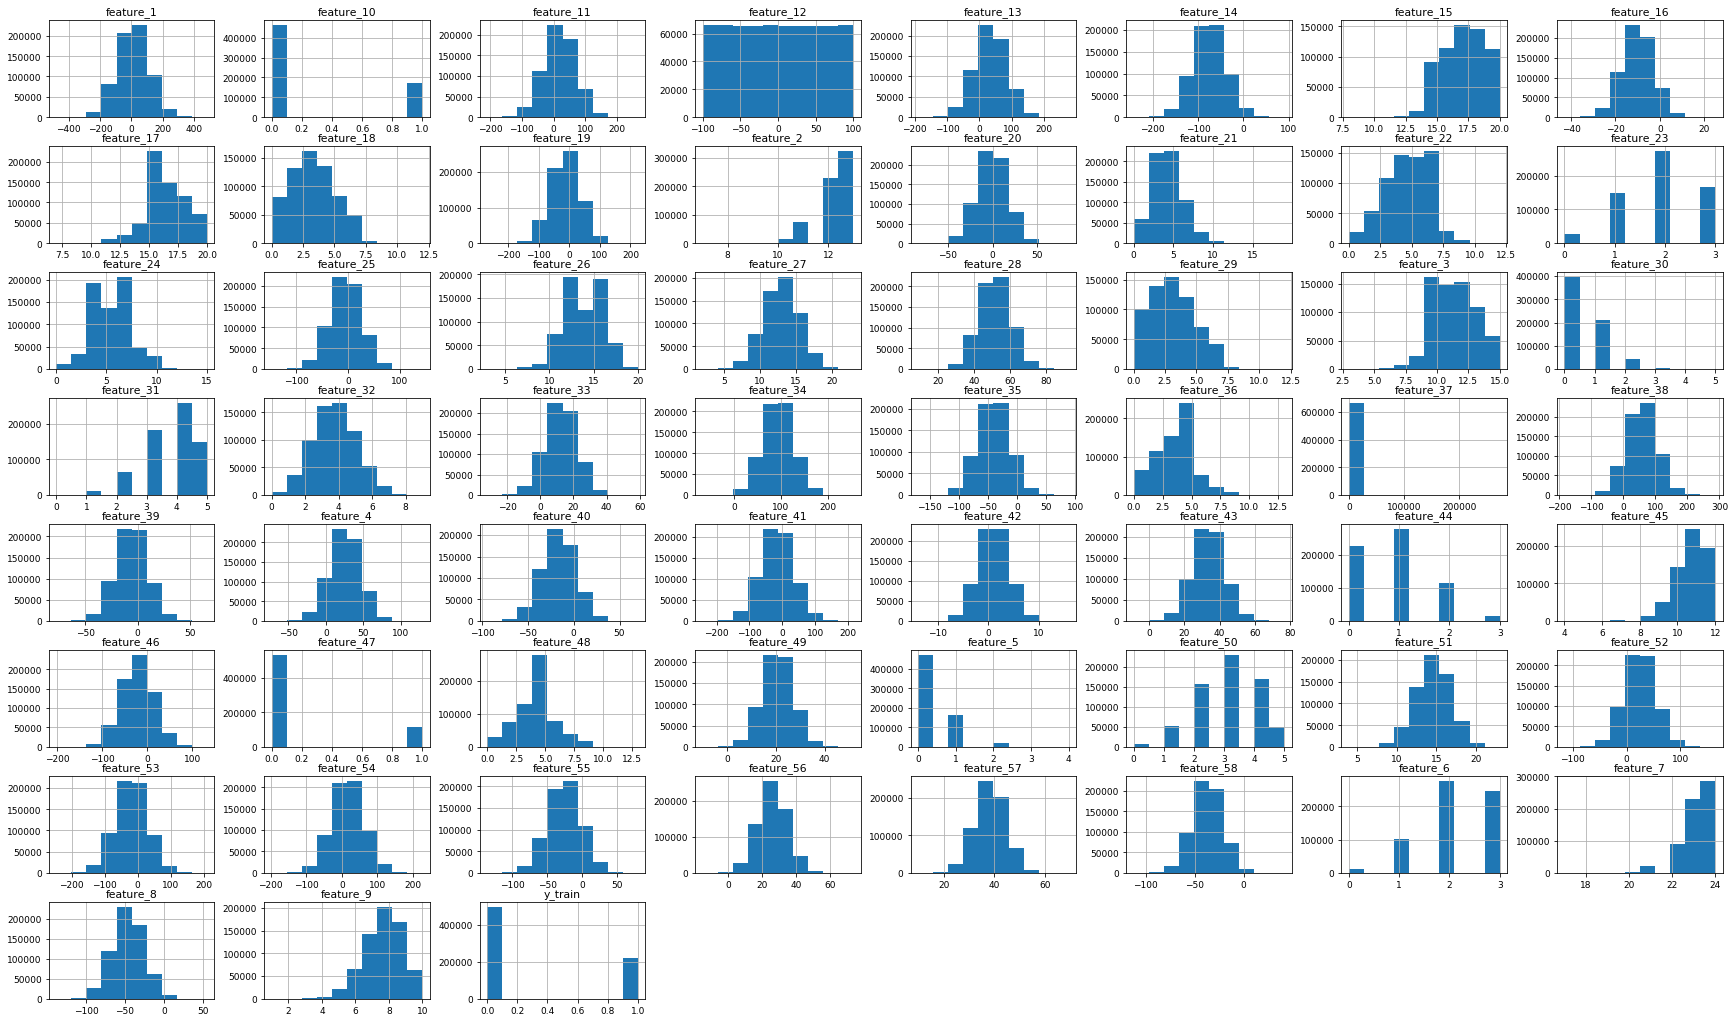

In [16]:
matplotlib.rcParams['figure.figsize'] = (30, 18)
matplotlib.rcParams['font.size'] = (9)
data.hist()
plt.show()